<a href="https://colab.research.google.com/github/sdutta1992/MelanomaDetection/blob/main/Assignment_CNN_Skin_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data


### Importing all the important libraries

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Rescaling
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
import zipfile
import glob
from keras import initializers
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Path to the zip file
zip_file_path = 'Put your path here'

# Extract the zip file into a directory
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('melanoma_dataset')

# After extraction, the dataset should be in the 'melanoma_dataset' directory

In [ ]:
os.walk('/content/melanoma_dataset')

<generator object _walk at 0x7a7167b76880>

###Understanding of the directory Structure

In [ ]:
subfolders = []
def list_subfolders(path):
    """List all subfolders in the given directory."""

    for entry in os.scandir(path):
        if entry.is_dir():
            subfolders.append(path+'/'+entry.name)
            list_subfolders(path+'/'+entry.name)

    return subfolders


folder_path = "/content/melanoma_dataset"
subfolders = list_subfolders(folder_path)
for subfolder in subfolders:
  print(subfolder)

/content/melanoma_dataset/Skin cancer ISIC The International Skin Imaging Collaboration
/content/melanoma_dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train
/content/melanoma_dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion
/content/melanoma_dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma
/content/melanoma_dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis
/content/melanoma_dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis
/content/melanoma_dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis
/content/melanoma_dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus
/content/melanoma_dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma
/content/melanoma_dataset/Skin ca

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/melanoma_dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/melanoma_dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Image data load through Keras

Image data loading through image_dataset_from_directory utility.

### Create a dataset

Defining some parameters for the image loader.

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
# Load the dataset with file paths and labels
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

print(type(train_ds))

Found 2239 files belonging to 9 classes.
Using 1792 files for training.
<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [ ]:
# Load the dataset with file paths and labels
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

print(type(val_ds))

Found 2239 files belonging to 9 classes.
Using 447 files for validation.
<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [ ]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data

In [ ]:
label_dict = {0: 'actinic keratosis', 1: 'basal cell carcinoma',2: 'dermatofibroma', 3: 'melanoma',4: 'nevus', 5: 'pigmented benign keratosis',6: 'seborrheic keratosis', 7: 'squamous cell carcinoma',8: 'vascular lesion'}

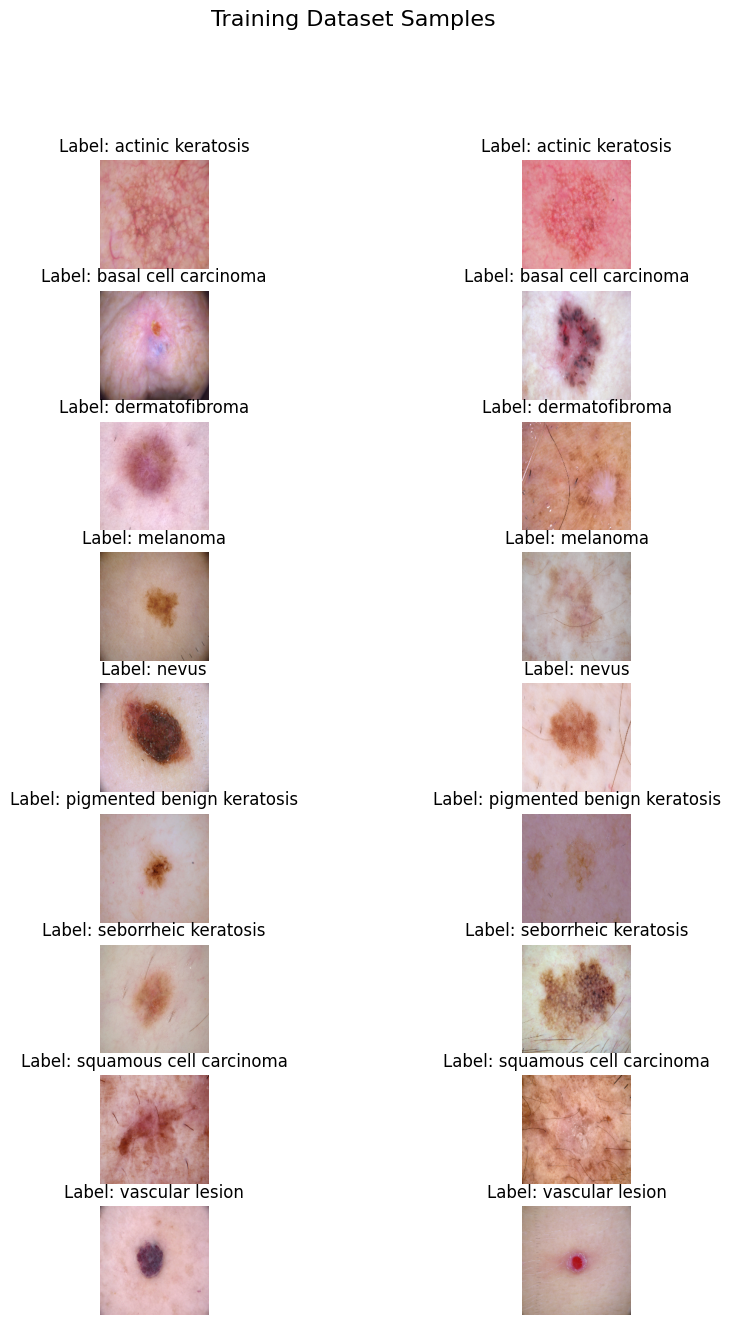

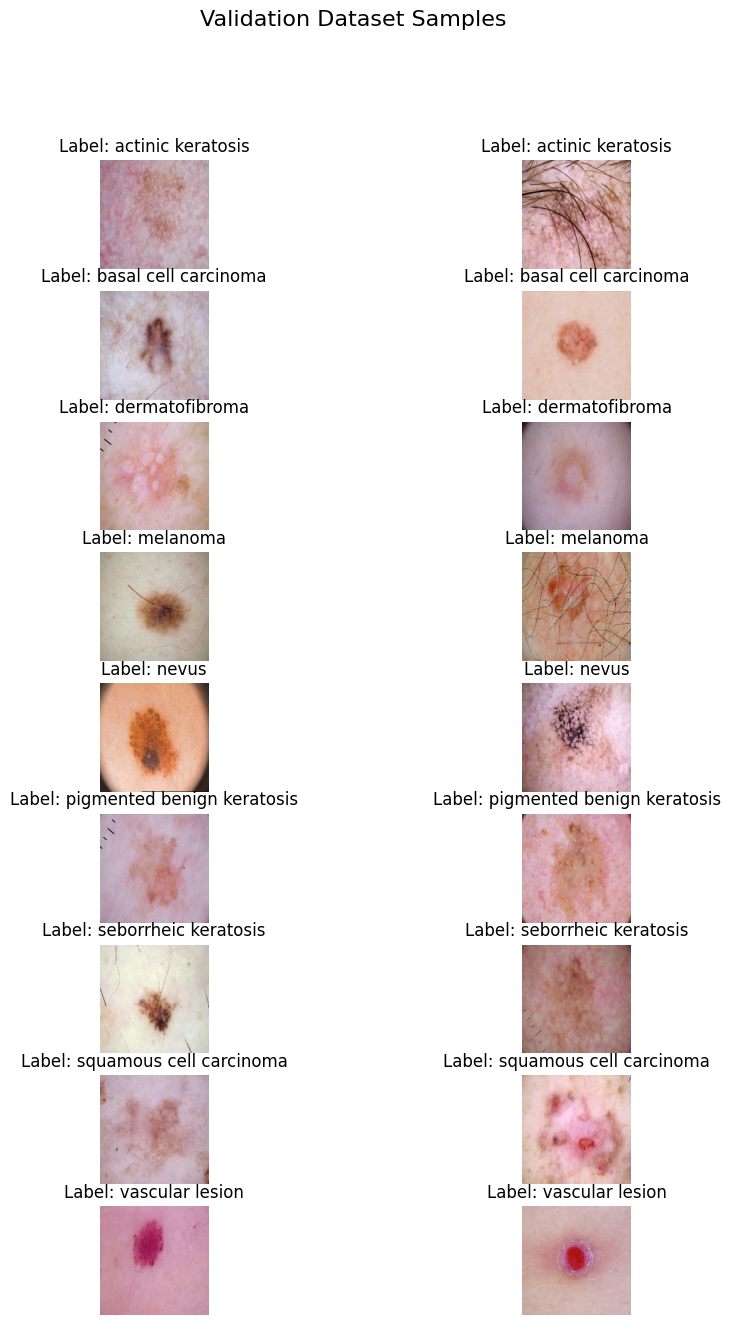

In [ ]:
import matplotlib.pyplot as plt


def visualize_dataset(dataset, title, num_samples=2, classes = 9):
    plt.figure(figsize=(10, 15))
    total_images = classes * num_samples  # Maximum number of images to visualize
    count = 0
    class_pointer = 0

    for images, labels in dataset.take(classes): # so images and dataset will have 32 samples in each iteration
        for j in range(images.shape[0]):
            if count >= total_images:
                break
            if labels[j].numpy() == class_pointer:
              plt.subplot(classes, num_samples, count + 1)
              plt.imshow(images[j].numpy().astype('uint8'))
              plt.title(f"Label: {label_dict.get(labels[j].numpy())}")
              plt.axis('off')
              count += 1
              if count%2 ==0:
                class_pointer = class_pointer+1

        if count >= total_images:
            break

    plt.suptitle(title, fontsize=16)
    plt.show()

# Example usage with batch size = 32
visualize_dataset(train_ds, 'Training Dataset Samples')
visualize_dataset(val_ds, 'Validation Dataset Samples')
# visualize_dataset(test_ds.batch(32), 'Test Dataset Samples')


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### CNN model, which can accurately detect 9 classes present in the dataset. ```layers.experimental.preprocessing.Rescaling``` has been used to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
keras.utils.set_random_seed(123)

In [ ]:
model12 = Sequential()
model12.add(Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model12.add(Conv2D(32, (3, 3), padding='same', kernel_initializer=initializers.HeNormal(seed=123), bias_initializer=initializers.HeNormal(seed=123)))
model12.add(Activation('relu'))
model12.add(layers.MaxPool2D(pool_size=(2,2)))
model12.add(Conv2D(64, (3, 3), padding='same', kernel_initializer=initializers.HeNormal(seed=123), bias_initializer=initializers.HeNormal(seed=123)))
model12.add(Activation('relu'))
model12.add(layers.MaxPool2D(pool_size=(2,2)))
model12.add(Conv2D(128, (3, 3), padding='same', kernel_initializer=initializers.HeNormal(seed=123), bias_initializer=initializers.HeNormal(seed=123)))
model12.add(Activation('relu'))
model12.add(MaxPooling2D(pool_size=(2, 2)))

model12.add(Flatten())
model12.add(Dense(128, kernel_initializer=initializers.HeNormal(seed=123), bias_initializer=initializers.HeNormal(seed=123)))
model12.add(Activation('relu'))
model12.add(Dense(9, kernel_initializer=initializers.HeNormal(seed=123), bias_initializer=initializers.HeNormal(seed=123)))
model12.add(Activation('softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compile the model
Choose an appropirate optimiser and loss function for model training

In [ ]:

model12.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model12.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 180, 180, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 61952)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       7,929,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │           1,161 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 9)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,024,393 (30.61 MB)

 Trainable params: 8,024,393 (30.61 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [ ]:
epochs = 20
history = model12.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 23s 107ms/step - accuracy: 0.2047 - loss: 9.5399 - val_accuracy: 0.3356 - val_loss: 1.8146
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 22s 32ms/step - accuracy: 0.3842 - loss: 1.7332 - val_accuracy: 0.4743 - val_loss: 1.5487
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5001 - loss: 1.4758 - val_accuracy: 0.5235 - val_loss: 1.4193
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.5361 - loss: 1.3748 - val_accuracy: 0.4676 - val_loss: 1.4907
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.5525 - loss: 1.2557 - val_accuracy: 0.4743 - val_loss: 1.5052
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - accuracy: 0.5663 - loss: 1.2444 - val_accuracy: 0.5145 - val_loss: 1.4465
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.6219 - loss: 1.0657 - val_accuracy: 0.5056 - val_loss: 1.4800
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6340 - loss: 1.0218 - val_accuracy: 0.5414 

### Visualizing training results

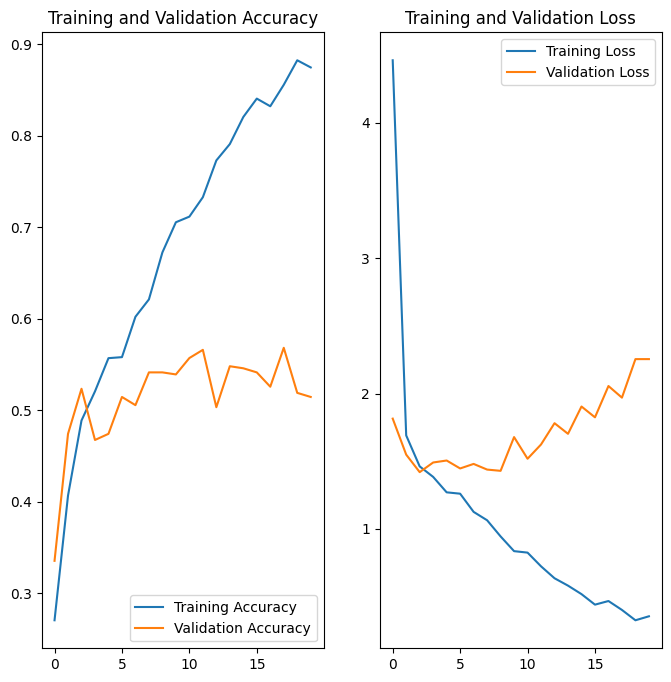

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Findings:

From the plots above , we can easily identify it the overfitting as there is a huge gap between training and validation accuracy.


This may have happened because of small number of training examples or extra features.

###Check the number of Images present for each label

In [ ]:
class_counts = {}
for label in class_names:
    class_counts[label] = len(os.listdir(os.path.join(data_dir_train, label)))

# Print the number of images for each label
for label, count in class_counts.items():
    print(f'Label: {label}, Count: {count}')

Label: actinic keratosis, Count: 114
Label: basal cell carcinoma, Count: 376
Label: dermatofibroma, Count: 95
Label: melanoma, Count: 438
Label: nevus, Count: 357
Label: pigmented benign keratosis, Count: 462
Label: seborrheic keratosis, Count: 77
Label: squamous cell carcinoma, Count: 181
Label: vascular lesion, Count: 139


### Check image augmentation scenarios to increase the number of images

In [ ]:


data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

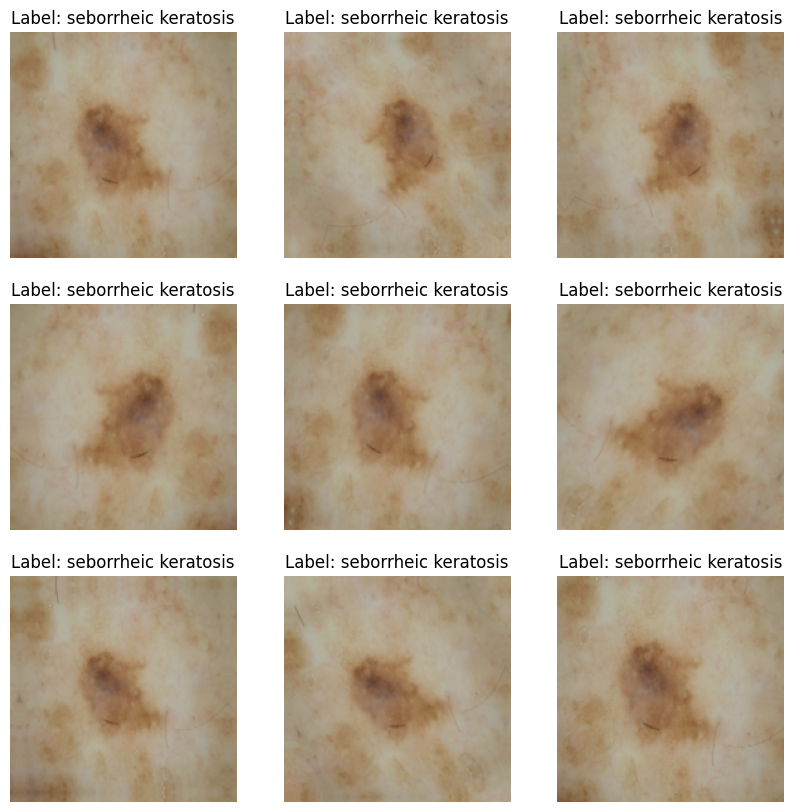

In [ ]:
# Visualize how augmentation strategy works for one instance of training image.
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.title(f"Label: {label_dict.get(labels[0].numpy())}")
    plt.axis("off")

### Adding dropout layer to initially remove extra features


In [ ]:
model5 = Sequential()
model5.add(Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model5.add(Conv2D(32, (3, 3), padding='same', kernel_initializer=initializers.HeNormal(seed=123), bias_initializer=initializers.HeNormal(seed=123)))
model5.add(Activation('relu'))
model5.add(layers.MaxPool2D(pool_size=(2,2)))
model5.add(Conv2D(64, (3, 3), padding='same', kernel_initializer=initializers.HeNormal(seed=123), bias_initializer=initializers.HeNormal(seed=123)))
model5.add(Activation('relu'))
model5.add(layers.MaxPool2D(pool_size=(2,2)))
model5.add(Conv2D(128, (3, 3), padding='same', kernel_initializer=initializers.HeNormal(seed=123), bias_initializer=initializers.HeNormal(seed=123)))
model5.add(Activation('relu'))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Dropout(0.35))

model5.add(Flatten())
model5.add(Dense(128, kernel_initializer=initializers.HeNormal(seed=123), bias_initializer=initializers.HeNormal(seed=123)))
model5.add(Activation('relu'))
model5.add(Dropout(0.40))
model5.add(Dense(9, kernel_initializer=initializers.HeNormal(seed=123), bias_initializer=initializers.HeNormal(seed=123)))
model5.add(Activation('softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Compiling the model

In [ ]:

model5.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model5.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 180, 180, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_6 (Activation)            │ (None, 90, 90, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 45, 45, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_7 (Activation)            │ (None, 45, 45, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 61952)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │       7,929,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 9)                   │           1,161 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 9)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,024,393 (30.61 MB)

 Trainable params: 8,024,393 (30.61 MB)

 Non-trainable params: 0 (0.00 B)

### Training the model

In [ ]:

epochs = 20
history =  model5.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.1660 - loss: 7.3340 - val_accuracy: 0.1946 - val_loss: 2.0526
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.2063 - loss: 2.1287 - val_accuracy: 0.1991 - val_loss: 1.9723
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.2298 - loss: 2.0596 - val_accuracy: 0.4049 - val_loss: 1.8343
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.2996 - loss: 1.9339 - val_accuracy: 0.3512 - val_loss: 1.7902
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.3520 - loss: 1.8384 - val_accuracy: 0.4609 - val_loss: 1.6477
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 33ms/step - accuracy: 0.3748 - loss: 1.7710 - val_accuracy: 0.4519 - val_loss: 1.6374
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.4265 - loss: 1.5737 - val_accuracy: 0.4877 - val_loss: 1.5523
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.4348 - loss: 1.5986 - val_accuracy: 0.4273 - v

### Visualizing the results

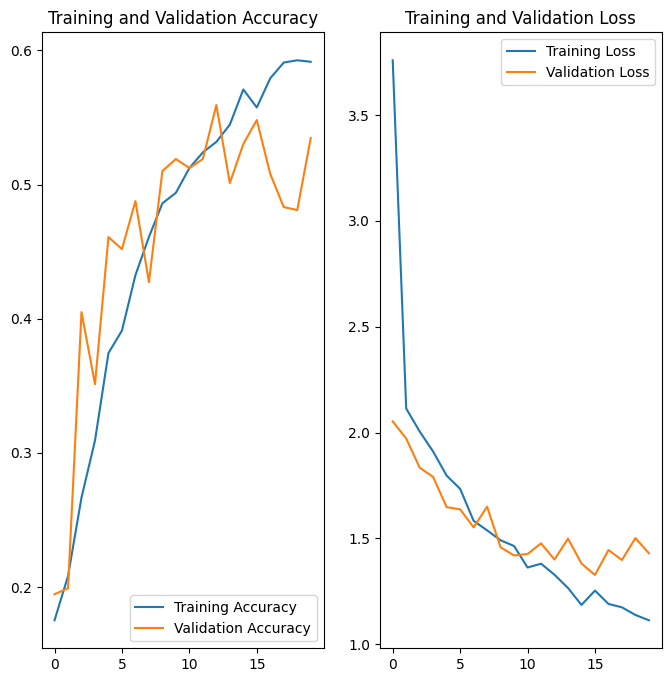

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Findings

We see that difference in training and validation accuracy has been decreased till 20 epochs but the traing accuracy dropped havoc. This is because of dropout layers and less no of images.

###Rectify the class imbalance
#### `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset=str(data_dir_train)+'/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(str(path_to_training_dataset) + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/melanoma_dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7A70E667E980>: 100%|██████████| 500/500 [00:15<00:00, 32.70 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/melanoma_dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A70E6736950>: 100%|██████████| 500/500 [00:15<00:00, 32.38 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/melanoma_dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7A70E677FA30>: 100%|██████████| 500/500 [00:15<00:00, 31.52 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/melanoma_dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7A70E67369B0>: 100%|██████████| 500/500 [01:26<00:00,  5.81 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/melanoma_dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1028x753 at 0x7A70E65378B0>: 100%|██████████| 500/500 [01:22<00:00,  6.04 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/melanoma_dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A70E6751720>: 100%|██████████| 500/500 [00:16<00:00, 30.27 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/melanoma_dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7A70E65066B0>: 100%|██████████| 500/500 [00:35<00:00, 14.05 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/melanoma_dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A70E6537D30>: 100%|██████████| 500/500 [00:15<00:00, 33.17 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/melanoma_dataset/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7A70F01F4CA0>: 100%|██████████| 500/500 [00:15<00:00, 32.23 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Augmented image data count

In [ ]:
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
# path_list

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
# lesion_list_new

In [ ]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
# new_df = original_df.append(df2)

In [ ]:
df2['Label'].value_counts()

,count
Label,
vascular lesion,500
dermatofibroma,500
actinic keratosis,500
seborrheic keratosis,500
pigmented benign keratosis,500
nevus,500
squamous cell carcinoma,500
basal cell carcinoma,500
melanoma,500


So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

### Model training with Augmented data


In [ ]:
batch_size = 32
img_height = 180
img_width = 180

####Create a training dataset

In [ ]:
# data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


####Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

####Model definition

In [ ]:
model25 = Sequential()
model25.add(Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model25.add(Conv2D(32, (3, 3), padding='same', kernel_initializer=initializers.HeNormal(seed=123), bias_initializer=initializers.HeNormal(seed=123)))
model25.add(Activation('relu'))
model25.add(layers.MaxPool2D(pool_size=(2,2)))
model25.add(Conv2D(64, (3, 3), padding='same', kernel_initializer=initializers.HeNormal(seed=123), bias_initializer=initializers.HeNormal(seed=123)))
model25.add(Activation('relu'))
model25.add(layers.MaxPool2D(pool_size=(2,2)))
model25.add(Conv2D(128, (3, 3), padding='same', kernel_initializer=initializers.HeNormal(seed=123), bias_initializer=initializers.HeNormal(seed=123)))
model25.add(Activation('relu'))
model25.add(MaxPooling2D(pool_size=(2, 2)))
model25.add(Dropout(0.35))

model25.add(Flatten())
model25.add(Dense(128, kernel_initializer=initializers.HeNormal(seed=123), bias_initializer=initializers.HeNormal(seed=123)))
model25.add(Activation('relu'))
model25.add(Dropout(0.40))
model25.add(Dense(9, kernel_initializer=initializers.HeNormal(seed=123), bias_initializer=initializers.HeNormal(seed=123)))
model25.add(Activation('softmax'))





/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


#### Model compile

In [ ]:
model25.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer='sgd',
              metrics=['accuracy'])

#### Model Training

In [ ]:
epochs = 50
history = model25.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 39s 91ms/step - accuracy: 0.1452 - loss: 2.9729 - val_accuracy: 0.2108 - val_loss: 2.1065
Epoch 2/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 8s 31ms/step - accuracy: 0.2166 - loss: 2.0959 - val_accuracy: 0.2784 - val_loss: 1.8945
Epoch 3/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.2770 - loss: 1.9331 - val_accuracy: 0.3259 - val_loss: 1.7707
Epoch 4/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.3512 - loss: 1.7586 - val_accuracy: 0.4863 - val_loss: 1.4881
Epoch 5/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.3986 - loss: 1.6047 - val_accuracy: 0.4744 - val_loss: 1.4707
Epoch 6/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.4249 - loss: 1.5566 - val_accuracy: 0.4380 - val_loss: 1.4695
Epoch 7/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.4536 - loss: 1.4619 - val_accuracy: 0.5679 - val_loss: 1.2356
Epoch 8/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 5s 31ms/step - accuracy: 0.4835 - loss: 1.4140 - val_ac

#### Visualize the model results

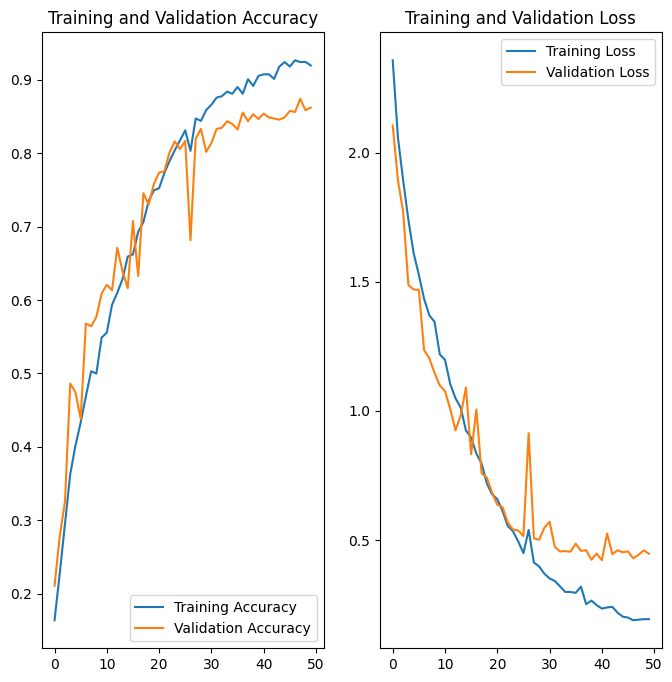

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Findings

It seems that the accuracy is quite good for both training and validation sets. Accuracy increased steadily also.



In [ ]:
model25.evaluate(train_ds)

169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.9539 - loss: 0.1046


[0.10419338196516037, 0.9554896354675293]

###Test data validation

In [ ]:
# Load the dataset with file paths and labels
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

print(type(test_ds))

Found 118 files belonging to 9 classes.
<class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [ ]:
model25.evaluate(test_ds)

4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.3492 - loss: 4.5824


[4.433674335479736, 0.37288135290145874]

####Generate the predicted result

In [ ]:
result = model25.predict(test_ds)
dict(zip(model25.metrics_names, result))

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 583ms/step


{'loss': array([0.02015823, 0.17312406, 0.00627586, 0.3487197 , 0.01382519,
        0.0325785 , 0.17352489, 0.16369022, 0.06810337], dtype=float32),
 'compile_metrics': array([5.4922482e-05, 3.2062732e-02, 2.5191298e-04, 2.9313336e-05,
        8.7651368e-03, 1.3846759e-01, 1.0390651e-05, 8.2035393e-01,
        4.0254154e-06], dtype=float32)}

In [ ]:
predicted_categories = np.argmax (result, axis = 1)

####Gather the true categories

In [ ]:
predicted_categories

array([3, 7, 4, 4, 5, 4, 4, 5, 5, 1, 4, 5, 4, 4, 4, 5, 2, 4, 1, 5, 4, 4,
       4, 4, 1, 3, 5, 7, 1, 5, 1, 3, 4, 3, 1, 1, 4, 5, 4, 5, 5, 1, 4, 0,
       4, 2, 5, 5, 4, 4, 2, 5, 4, 7, 5, 5, 5, 4, 4, 4, 1, 1, 5, 4, 1, 4,
       4, 1, 4, 3, 5, 5, 4, 3, 1, 5, 4, 4, 5, 1, 4, 5, 5, 4, 8, 5, 7, 1,
       5, 2, 1, 4, 4, 5, 4, 5, 5, 7, 4, 4, 2, 2, 5, 7, 5, 4, 4, 4, 4, 5,
       8, 3, 5, 5, 5, 5, 6, 1])

In [ ]:
true_categories = tf.concat([y for x, y in test_ds], axis=0)

In [ ]:
true_categories

<tf.Tensor: shape=(118,), dtype=int32, numpy=
array([0, 0, 4, 4, 1, 4, 7, 3, 4, 1, 2, 3, 3, 1, 2, 5, 5, 7, 1, 7, 0, 3,
       1, 3, 4, 6, 0, 1, 4, 0, 5, 2, 0, 0, 1, 4, 8, 0, 5, 3, 8, 7, 2, 0,
       2, 5, 1, 3, 4, 5, 0, 1, 4, 3, 7, 5, 3, 1, 7, 0, 0, 6, 2, 2, 5, 4,
       2, 0, 5, 1, 7, 3, 2, 3, 2, 5, 2, 4, 3, 0, 5, 1, 2, 7, 3, 5, 4, 0,
       7, 3, 2, 7, 4, 7, 7, 1, 5, 2, 6, 3, 0, 5, 4, 7, 8, 4, 5, 1, 3, 1,
       1, 7, 2, 5, 7, 2, 7, 4], dtype=int32)>

####Confusion matrix

In [ ]:
conf_mat=confusion_matrix(predicted_categories, true_categories)
conf_mat

array([[1, 0, 0, 0, 0, 0, 0, 0, 0],
       [4, 3, 2, 0, 4, 2, 1, 1, 0],
       [2, 0, 0, 1, 0, 3, 0, 0, 0],
       [2, 1, 1, 1, 0, 0, 1, 1, 0],
       [3, 4, 8, 5, 9, 5, 1, 6, 1],
       [3, 6, 4, 7, 2, 6, 0, 6, 2],
       [0, 0, 0, 0, 0, 0, 0, 1, 0],
       [1, 1, 1, 1, 1, 0, 0, 1, 0],
       [0, 1, 0, 1, 0, 0, 0, 0, 0]])

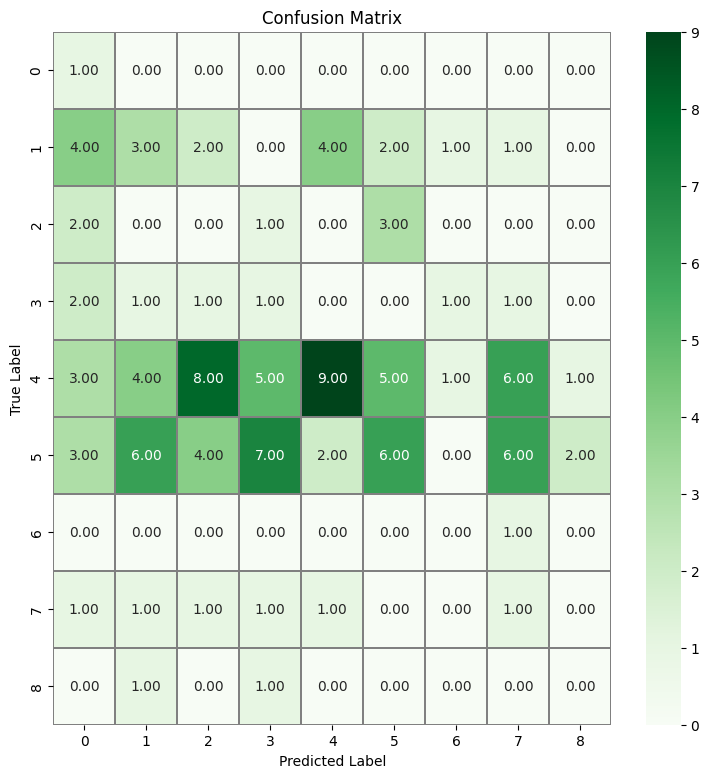

In [ ]:
f,ax = plt.subplots(figsize=(9, 9))
sns.heatmap(conf_mat, annot = True, linewidths = 0.01, cmap = "Greens", linecolor = "gray", fmt = ".2f", ax = ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

####Classification report

In [ ]:
print(classification_report(true_categories, predicted_categories, target_names=class_names))

                            precision    recall  f1-score   support

         actinic keratosis       1.00      0.06      0.12        16
      basal cell carcinoma       0.18      0.19      0.18        16
            dermatofibroma       0.00      0.00      0.00        16
                  melanoma       0.14      0.06      0.09        16
                     nevus       0.21      0.56      0.31        16
pigmented benign keratosis       0.17      0.38      0.23        16
      seborrheic keratosis       0.00      0.00      0.00         3
   squamous cell carcinoma       0.17      0.06      0.09        16
           vascular lesion       0.00      0.00      0.00         3

                  accuracy                           0.18       118
                 macro avg       0.21      0.15      0.11       118
              weighted avg       0.25      0.18      0.14       118

